# Majority rule

AKA voting rule: each cell switches its state to a local majority choice within its neighborhood.

In [61]:
import matplotlib.pyplot as plt
import numpy as np

def get_moore_neighborhood(state, x, y):
    """Return the Moore neighborhood of the point `coords`."""
    nbhd = np.zeros((3,3))

    ny, nx = state.shape
    if 0 < x < nx-1 and 0 < y < ny-1:
        return np.array(state[y-1:y+2, x-1:x+2])
    else:
        if x == 0:
            tmp = np.concatenate([state[:, -1].reshape(1,-1), state[:,0:2].T], axis=0).T
            x = 1
        elif x == nx-1:
            tmp = np.concatenate([state[:, -2:].T, state[:, 0].reshape(1,-1)], axis=0).T
            x = 1

        if y == 0:
            tmp = np.concatenate([state[-1, :].reshape(1,-1), state[0:2,:]], axis=0)
            y = 1
        elif y == ny-1:
            tmp = np.concatenate([state[-2:, :], state[0,:].reshape(1,-1)], axis=0)
            y = 1

        return tmp[y-1:y+2, x-1:x+2]
        

def majority(arr: np.array) -> int:
    return np.round(np.sum(arr) / np.size(arr))


def update(state):
    # get new state
    state_new = np.zeros_like(state)

    for y in range(state.shape[0]):
        for x in range(state.shape[1]):
            nbhd = get_moore_neighborhood(state, x=x, y=y)
            state_new[y, x] = majority(nbhd)

    return state_new

In [68]:
state = np.random.choice([0,1], p=[0.3, 0.7], size=(sz,sz))


0.6998

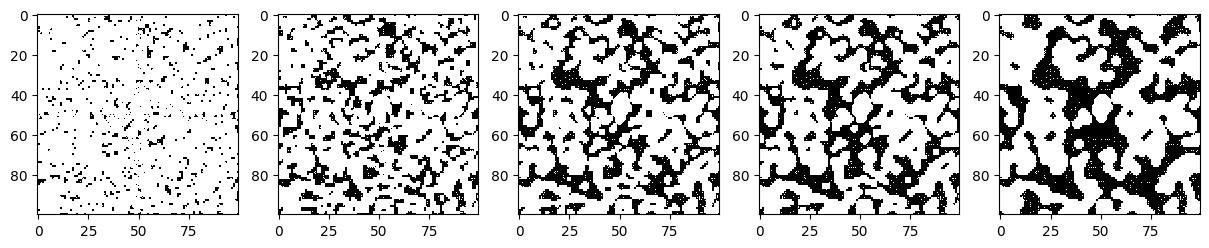

In [72]:
from matplotlib import colors

sz = 100
# state = np.random.randint(2, size=(sz,sz))
state = np.random.choice([0,1], p=[0.5, 0.5], size=(sz,sz))
# create discrete colormap
cmap = colors.ListedColormap(['white', 'black'])
bounds = [0, 1, 2]
norm = colors.BoundaryNorm(bounds, cmap.N)

fig, ax = plt.subplots(ncols=5,figsize=(15,3))
ax[0].imshow(state, cmap=cmap, norm=norm)

state_new = update(state)
ax[1].imshow(state_new, cmap=cmap, norm=norm)

state_new = update(state_new)
ax[2].imshow(state_new, cmap=cmap, norm=norm)

state_new = update(state_new)
ax[3].imshow(state_new, cmap=cmap, norm=norm)

for _ in range(200):
    state_new = update(state_new)
ax[4].imshow(state_new, cmap=cmap, norm=norm)